<a href="https://colab.research.google.com/github/Yassine-Feki/M-moire-ESG-EV-EBITDA-/blob/main/Automobiles_et_composants%20test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm



In [66]:
# Upload du fichier
uploaded = files.upload()

Saving Automobiles et composants test .xlsx to Automobiles et composants test  (4).xlsx


In [67]:
fichier = list(uploaded.keys())[0]
df = pd.read_excel(fichier)
display(df)

,Name,Description,Market Cap,Revenues,EV,EBITDA,EV/EBITDA,ESG Score,Norm ESG rating,alpha,ESG Coef,ESG EV/EBITDA
0,Ford Motor Company,USA,40191,184992,169460,10096,16.784865,43,0.017143,0.102968,1.001765,16.814493
1,"Tesla, Inc",USA,1403000,97690,1070000,13128,81.505180,31,-0.462857,0.011081,0.994871,81.087128
2,General Motors Company,USA,15085,187044,161960,24024,6.741592,47,0.177143,0.129732,1.022981,6.896520
3,Lear Corporation,USA,5360,23302,7068,1566,4.513410,55,0.497143,0.178767,1.088873,4.914530
4,BorgWarner Inc.,USA,7075,14083,11037,1932,5.712733,49,0.257143,0.142519,1.036648,5.922092
5,Dana Incorporated,USA,1722,10284,5510,754,7.307692,50,0.297143,0.148775,1.044207,7.630746
6,The Goodyear Tire & Rubber Company,USA,9693,18878,10670,1822,5.856202,54,0.457143,0.172932,1.079055,6.319163
7,PACCAR Inc,USA,54694,33652,60770,6019,10.096362,47,0.177143,0.129732,1.022981,10.328386
8,"AutoZone, Inc",USA,53765,18490,80690,4338,18.600738,33,-0.382857,0.027810,0.989353,18.402690
9,Thor Industries,USA,5598,10044,6410,702,9.131054,35,-0.302857,0.043918,0.986699,9.009602


In [68]:
data_to_plot = df[['EV/EBITDA', 'ESG EV/EBITDA']]

In [69]:
data_to_plot = data_to_plot.rename(columns={'ESG EV/EBITDA': 'ESG-adjusted'})

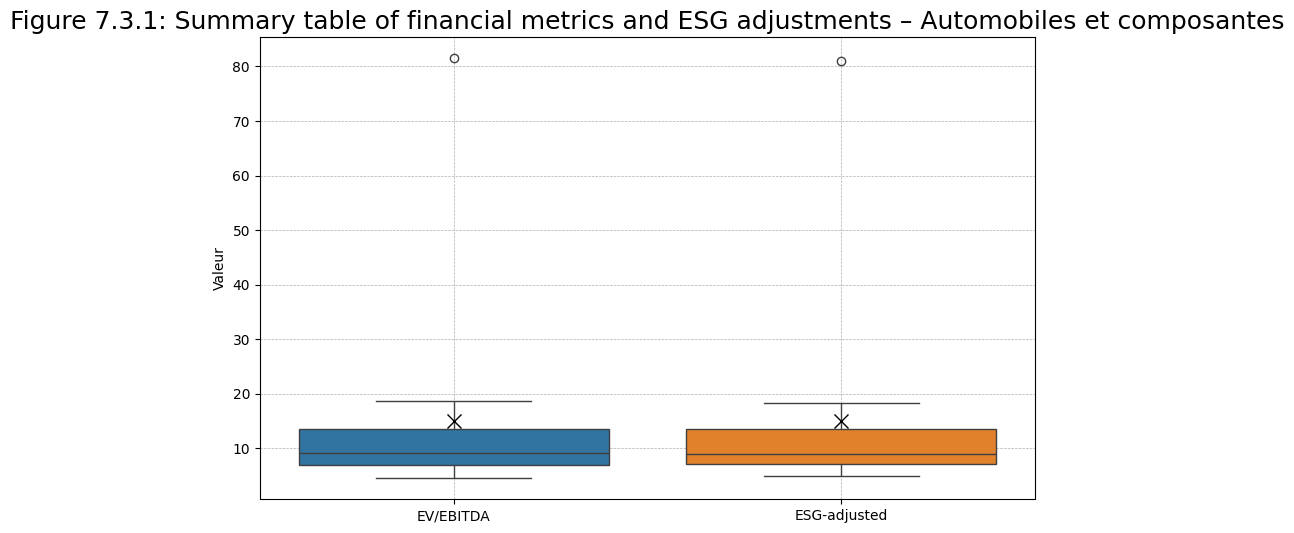

In [70]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_to_plot, showmeans=True, meanprops={"marker":"x",
                       "markerfacecolor":"black",
                       "markeredgecolor":"black",
                       "markersize":"10"})

# Ajoutez les titres et les labels pour correspondre au graphique original
plt.title('Figure 7.3.1: Summary table of financial metrics and ESG adjustments – Automobiles et composantes', fontsize=18)
plt.ylabel('Valeur')
plt.xlabel('') # Laissez l'axe x vide car les étiquettes sont gérées par le boxplot
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Affichez le graphique
plt.show()

Saving Automobiles et composants test .xlsx to Automobiles et composants test  (5).xlsx
Corrélation (sans min, max, average, median) : -0.5107


/tmp/ipython-input-1224159930.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f"{y:,.1f}x" for y in plt.gca().get_yticks()])
/tmp/ipython-input-1224159930.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([f"{x:,.1f}" for x in plt.gca().get_xticks()])


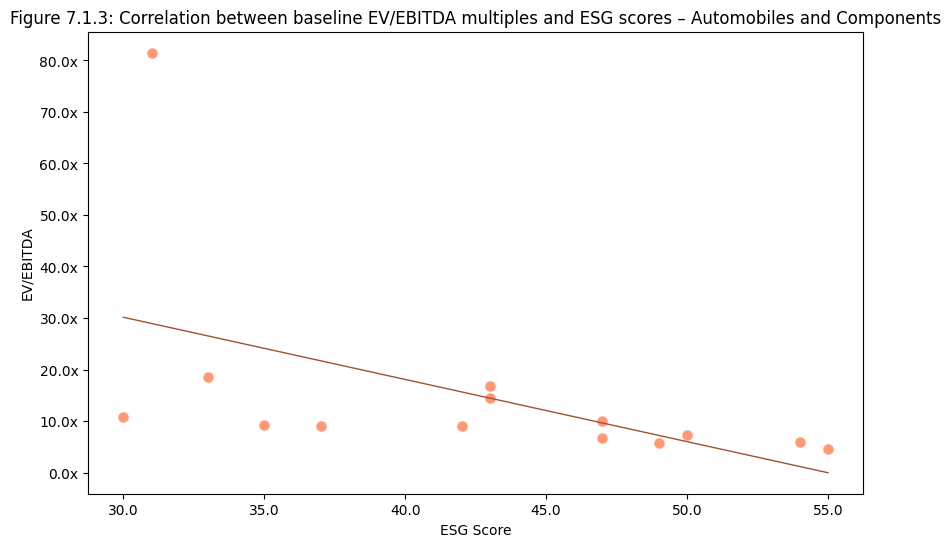

In [71]:
# Upload du fichier
uploaded = files.upload()

df.columns = df.columns.str.strip()

# Suppression des lignes contenant min, max, average, median dans la colonne 'Name'
df = df[~df['Name'].str.lower().isin(['min', 'max', 'average', 'median'])]

# Variables
x_col = 'ESG Score'
y_col = 'EV/EBITDA'

# Corrélation
correlation = df[y_col].corr(df[x_col])
print(f"Corrélation (sans min, max, average, median) : {correlation:.4f}")

# Création du graphique
plt.figure(figsize=(10, 6))

sns.regplot(
    data=df,
    x=x_col,
    y=y_col,
    scatter_kws={"color": "coral", "s": 70, "edgecolor": "white", "alpha": 0.8, "marker": "D"},
    line_kws={"color": "sienna", "linewidth": 1},
    ci=None
)

# Titre
plt.title('Figure 7.1.3: Correlation between baseline EV/EBITDA multiples and ESG scores – Automobiles and Components', fontsize=12)

# Format ticks
plt.gca().set_yticklabels([f"{y:,.1f}x" for y in plt.gca().get_yticks()])
plt.gca().set_xticklabels([f"{x:,.1f}" for x in plt.gca().get_xticks()])

plt.show()

Résultats de la régression linéaire :
                            OLS Regression Results                            
Dep. Variable:              EV/EBITDA   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     4.234
Date:                Mon, 25 Aug 2025   Prob (F-statistic):             0.0620
Time:                        18:13:49   Log-Likelihood:                -58.889
No. Observations:                  14   AIC:                             121.8
Df Residuals:                      12   BIC:                             123.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         

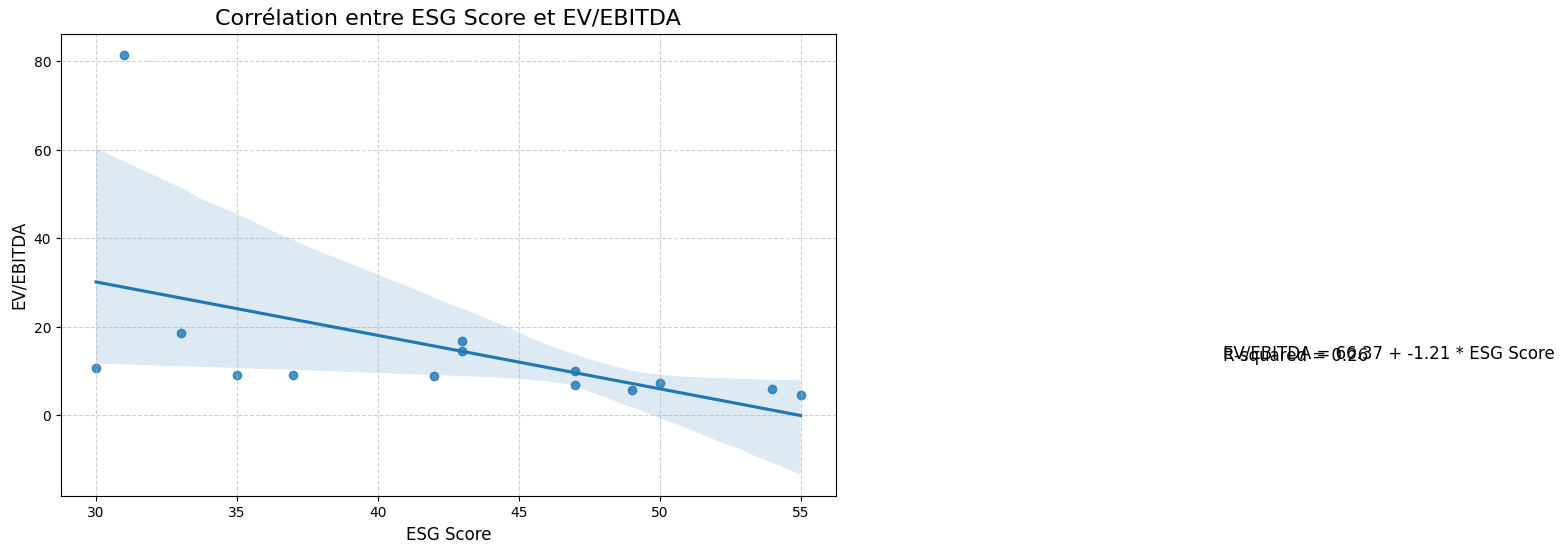

In [72]:
# Nettoyer les noms de colonnes pour enlever les espaces
df.columns = df.columns.str.strip()

# Filtrer les lignes de statistiques (Min, Max, etc.)
df_cleaned = df.loc[~df['Name'].isin(['min', 'Max', 'Average', 'Median'])]

# Définir les variables X (indépendante) et Y (dépendante)
X = df_cleaned['ESG Score']
Y = df_cleaned['EV/EBITDA']

# Ajouter une constante à X pour le modèle de régression
X = sm.add_constant(X)

# Créer et ajuster le modèle de régression linéaire
model = sm.OLS(Y, X).fit()

# Afficher le résumé des résultats du modèle
print("Résultats de la régression linéaire :")
print(model.summary())

# Créer le graphique
plt.figure(figsize=(10, 6))

# Créer un nuage de points avec la ligne de régression
sns.regplot(x='ESG Score', y='EV/EBITDA', data=df_cleaned)

# Ajouter des annotations pour le R-squared et l'équation
r_squared = model.rsquared
alpha_val = model.params['const']
beta_val = model.params['ESG Score']

# Ajouter l'équation sur le graphique
plt.text(70, 13, f'EV/EBITDA = {alpha_val:.2f} + {beta_val:.2f} * ESG Score', fontsize=12)

# Ajouter le R-squared sur le graphique
plt.text(70, 12.5, f'R-squared = {r_squared:.2f}', fontsize=12)

# Ajouter un titre et des labels
plt.title('Corrélation entre ESG Score et EV/EBITDA', fontsize=16)
plt.xlabel('ESG Score', fontsize=12)
plt.ylabel('EV/EBITDA', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Sauvegarder le graphique
plt.savefig('regression_esg_ev_ebitda.png')

# Afficher le graphique
plt.show()

Matrice de corrélation :


,Market Cap,Revenues,EV,EBITDA,EV/EBITDA,ESG Score,Norm ESG rating,alpha,ESG Coef,ESG EV/EBITDA
Market Cap,1.000000,0.255923,0.983682,0.369887,0.982453,-0.407951,-0.407951,-0.424142,-0.209358,0.983492
Revenues,0.255923,1.000000,0.422382,0.894402,0.270026,0.043955,0.043955,0.056037,-0.070157,0.271046
EV,0.983682,0.422382,1.000000,0.515181,0.974113,-0.393197,-0.393197,-0.405725,-0.229055,0.975074
EBITDA,0.369887,0.894402,0.515181,1.000000,0.352725,-0.015308,-0.015308,-0.008272,-0.077566,0.353723
EV/EBITDA,0.982453,0.270026,0.974113,0.352725,1.000000,-0.510677,-0.510677,-0.522757,-0.333208,0.999957
ESG Score,-0.407951,0.043955,-0.393197,-0.015308,-0.510677,1.000000,1.000000,0.998421,0.870996,-0.503417
Norm ESG rating,-0.407951,0.043955,-0.393197,-0.015308,-0.510677,1.000000,1.000000,0.998421,0.870996,-0.503417
alpha,-0.424142,0.056037,-0.405725,-0.008272,-0.522757,0.998421,0.998421,1.000000,0.842029,-0.515736
ESG Coef,-0.209358,-0.070157,-0.229055,-0.077566,-0.333208,0.870996,0.870996,0.842029,1.000000,-0.324917
ESG EV/EBITDA,0.983492,0.271046,0.975074,0.353723,0.999957,-0.503417,-0.503417,-0.515736,-0.324917,1.000000


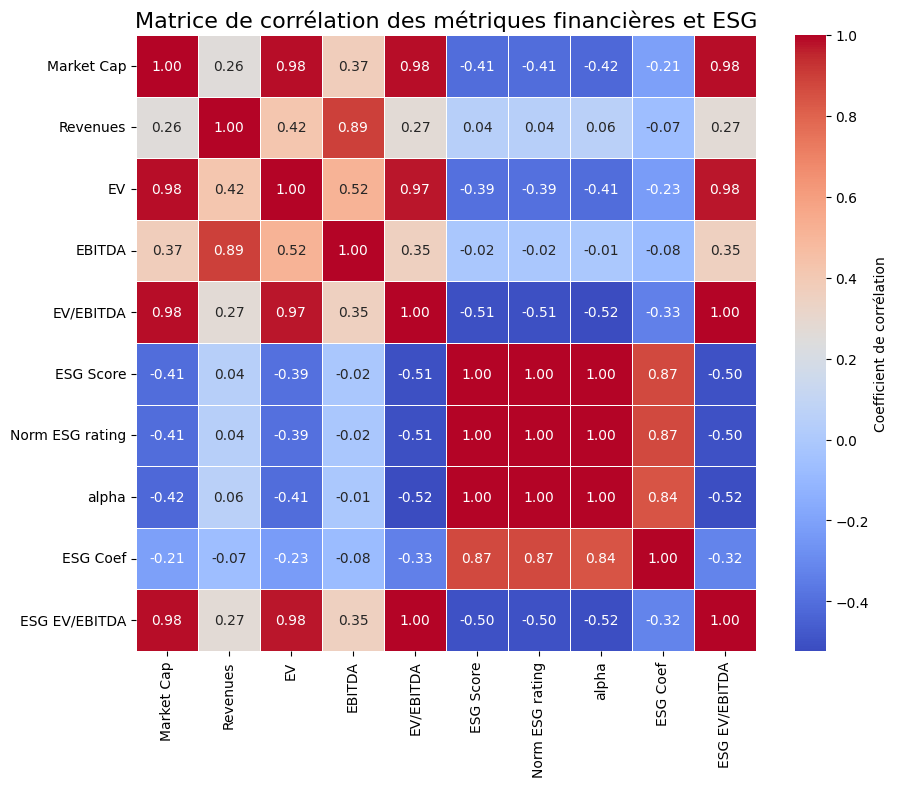

In [73]:
# On exclut les colonnes non numériques comme 'Name'
df_numeric = df.select_dtypes(include=np.number)

# Calculer la matrice de corrélation
correlation_matrix = df_numeric.corr()

# Afficher la matrice de corrélation
print("Matrice de corrélation :")
display(correlation_matrix)

# Créer une carte de chaleur (heatmap) pour visualiser la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,         # Affiche les valeurs de corrélation sur la carte
    fmt=".2f",          # Formate les nombres à deux décimales
    cmap="coolwarm",    # Définit la palette de couleurs
    linewidths=.5,      # Ajoute des lignes entre les cellules
    cbar_kws={'label': 'Coefficient de corrélation'}
)

# Ajouter un titre au graphique
plt.title('Matrice de corrélation des métriques financières et ESG', fontsize=16)

# Afficher le graphique
plt.show()